In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing

In [3]:
df= pd.read_csv("sales-of-shampoo-over-a-three-ye.csv", index_col=0)
df.head()

,Sales of shampoo over a three year period
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


In [5]:

y = df['Sales of shampoo over a three year period']
y_train = y[:-6]
y_test = y[-6:]
y_train.shape, y_test.shape

((30,), (6,))

C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


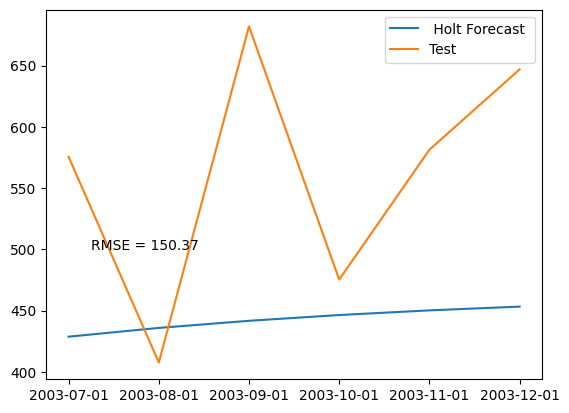

In [35]:
holt = Holt(y_train, exponential= True, damped_trend=True)
fit1= holt.fit()
fcast1 = fit1.forecast(len(y_test))

holt_fcast = pd.Series(fcast1,index=y_test.index)
error = round(root_mean_squared_error(y_test,holt_fcast),2)
holt_fcast.index= y_test.index

plt.text(0.25,500,"RMSE = "+str(error))
plt.plot(holt_fcast,label=" Holt Forecast ")
plt.plot(y_test,label="Test")
plt.legend(loc='best')
plt.show()

C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


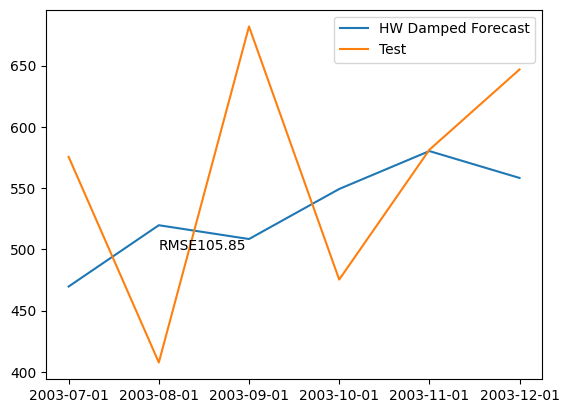

In [31]:
alpha,beta,gamma=0.2,0.5,0.2
hw_ml = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add')
fit3 = hw_ml.fit(smoothing_level= alpha, smoothing_trend=beta, smoothing_seasonal = gamma)
fcast3=fit3.forecast(len(y_test))
hw_ml_fcast = pd.Series(fcast3,index=y_test.index)
error = round(root_mean_squared_error(y_test,hw_ml_fcast) ,2)
y_test.index= hw_ml_fcast.index
plt.text(1,500,"RMSE"+str(error))
plt.plot(hw_ml_fcast,label='HW Damped Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

In [30]:
fit3.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.5,
 'smoothing_seasonal': 0.2,
 'damping_trend': 0.995,
 'initial_level': 200.26742033624635,
 'initial_trend': -6.82059074140789,
 'initial_seasons': array([ 17.65672048, -17.62566058, -30.46794099,  -4.41048279,
        -30.33024291,  -0.92250616,   2.89006832,  31.58926171,
          1.34331682,  16.49586389,  41.26268161,  -7.25764617]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [33]:
model= auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings= True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=346.449, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=325.552, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=344.577, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=329.759, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=327.544, Time=0.72 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=327.542, Time=0.76 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=325.742, Time=0.37 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=344.139, Time=0.28 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=325.838, Time=0.55 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=322.439, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=327.141, Time=0.12 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=32

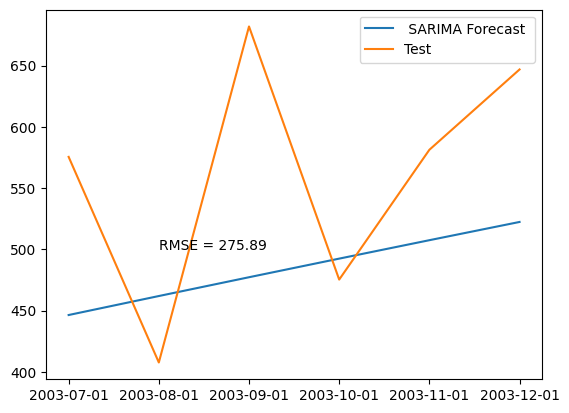

In [26]:
y_pred.index= y_test.index
error = round(root_mean_squared_error(y_test,y_pred),2)

plt.text(1,500,"RMSE = "+str(error))
plt.plot(holt_fcast,label=" SARIMA Forecast ")
plt.plot(y_test,label="Test")
plt.legend(loc='best')
plt.show()

In [28]:
model= auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings= True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=346.449, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=325.552, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=344.577, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=329.759, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=327.544, Time=0.73 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=327.542, Time=0.75 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=325.742, Time=0.35 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=344.139, Time=0.25 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=325.838, Time=0.51 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=322.439, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=327.141, Time=0.12 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=32

In [27]:
model = ARIMA(y_train,order=(1,0,0),freq='MS')
model_fit = model.fit()
model_fit.params

C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const      270.240576
ar.L1        0.576954
sigma2    6298.149321
dtype: float64

In [19]:
y_pred = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)

In [20]:
y_pred= model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)

TypeError: Model.predict() missing 1 required positional argument: 'params'